# HW2 Problem 4

In [2]:
# import relevant packages
import numpy as np 
import matplotlib.pyplot as plt
import math 

In [3]:
# load the data
x = np.load('hw2p4_data/fashion_mnist_images.npy')
y = np.load('hw2p4_data/fashion_mnist_labels.npy')
d, n = x.shape

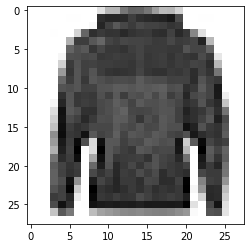

In [4]:
# visualize 
i = 0 #Index of the image to be visualized
plt.imshow(np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
plt.show()

In [5]:
# split the data into test and train
train_x = x[:,:5000]
train_y = y[0,:5000]
test_x = x[:,5000:]
test_y = y[0,5000:]

In [6]:
class logistic_regression:
    ## constructor
    def __init__(self,x,y,d,n):
        self.d = d        # number of features                        
        self.n = n        # number of examples
        self.x_tilde = np.vstack((np.ones(n),x)) # x augmented with a cloumn of ones
        self.y = y  # set of labels
        
     
    ## methods
    # objective function - log likelihood
    def objective(self,theta,reg_const):
        
        # for ease of coding unpack self
        n = self.n
        y = self.y
        x_tilde = self.x_tilde
        
        phi = np.sum([np.log(1+np.exp(-y[i]*np.dot(theta,x_tilde[:,i]))) for i in range(n)])
        return phi + reg_const*np.dot(theta,theta)
    
    
    # gradient - log likelihood
    def gradient(self,theta,reg_const):
        
        # for ease of coding unpack self
        n = self.n
        y = self.y
        x_tilde = self.x_tilde
        
        gradient_log_likelihood = 0
        for i in range(n):
            gradient_log_likelihood += -1/(1+np.exp(y[i]*np.dot(theta,x_tilde[:,i])))*y[i]*x_tilde[:,i]
        return gradient_log_likelihood + 2*reg_const*theta
    
    
    # hessian - log likelihood
    def hessian(self,theta,reg_const):
        
        # for ease of coding unpack self
        n = self.n
        y = self.y
        x_tilde = self.x_tilde
        
        hessian_log_likelihood = 0
        for i in range(self.n):
            hessian_log_likelihood += np.exp(y[i]*np.dot(theta,x_tilde[:,i]))/(1+np.exp(y[i]*np.dot(theta,x_tilde[:,i])))**2*y[i]**2*np.outer(x_tilde[:,i],x_tilde[:,i])
        return hessian_log_likelihood + 2*reg_const*np.eye(self.d+1)
    
    # newtons_method 
    def newtons_method(self, theta_0,reg_const,tolerance):
        theta_t = theta_0 # initialize theta at step t to theta_0
        iteration = 0
        step_change = math.inf
        while(step_change > tolerance):
            
            # at step t
            gradient_t = self.gradient(theta_t,reg_const)
            hessian_t = self.hessian(theta_t,reg_const)
            objective_t = self.objective(theta_t,reg_const)
            
            # at step t+1
            theta_t1 = theta_t - np.matmul(np.linalg.inv(hessian_t),gradient_t)
            objective_t1 = self.objective(theta_t1,reg_const)
            
            step_change = np.absolute(objective_t1 - objective_t)/objective_t # update step_change
            theta_t = theta_t1                        # update theta
            iteration += 1                            # update iteration
            
        return theta_t, iteration, objective_t
    

In [7]:
### problem 4a - error, objective and interations

n_train = train_x.shape[1] # number of trainning examples

# declare a class object 
prob4 = logistic_regression(train_x,train_y,d,n_train)

# inputs to the newtons method
theta_0 = np.zeros(d+1) # inital guess for optimization
reg_const = 1           # regularization constant
tolerance = 1e-6        # optimization tolerance

# run the optimzation (theta_hat - solution of the optimization)
theta_hat, iteration, objective = prob4.newtons_method(theta_0,reg_const,tolerance)
print('logistic regression results\niterations to converge: {} \nvalue of the objective function: {}'.format(iteration,objective))

logistic regression results
iterations to converge: 9 
value of the objective function: 456.63896507162525


In [8]:
# prediction for test data
n_test = test_x.shape[1]                           # number of test examples
predicted_y = np.zeros(n_test)                     # predefine
test_x_tilde = np.vstack((np.ones(n_test),test_x)) # augment test_x 
classes = np.array([-1,1])                         # classes (iteration purpose - for loop)
eta = np.zeros((2,n_test))

for i in range(n_test):
    # computation of posterior probability using sigmod function 
    eta[:,i] = np.array([1/(1+np.exp(-j*np.dot(theta_hat,test_x_tilde[:,i]))) for j in classes])
    
    # assign class that maximizes posterior 
    # this is equvivalent to saying eta > 0.5 for any particular class
    predicted_y[i] = classes[np.argmax(eta[:,i])]

# error assoiated with prediction
test_error = np.sum(test_y != predicted_y)/n_test*100
print('error in classification: {} %\n'.format(test_error))

error in classification: 3.4000000000000004 %



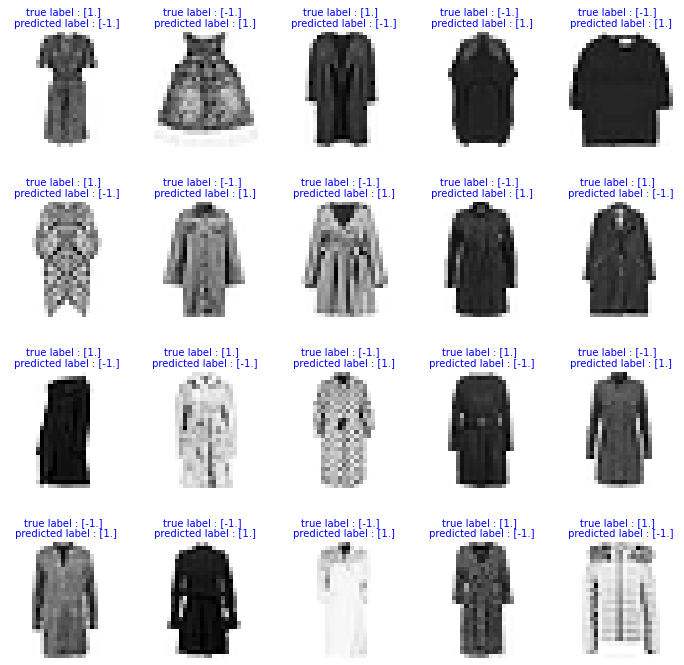

In [11]:
### problem 4b - generate 20 images 

# misclassified
misclassified = np.argwhere(test_y != predicted_y)

# confidence associated with mis-classifications
eta_misclassified = np.zeros(np.size(misclassified))
for i in range(np.size(misclassified)):
    eta_misclassified[i] = np.max(eta[:,misclassified[i]])
    
# arg sort to find the top 20 misclassifications in the test set
top20_misclassified = np.flip(misclassified[np.argsort(eta_misclassified)[-20:]])



# plot
fig = plt.figure(figsize=(12, 12))
rows = 4
columns = 5
for k in range(20):
    i = top20_misclassified[k]
    fig.add_subplot(rows, columns, k+1)
    plt.imshow(np.reshape(test_x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
    plt.axis('off')
    plt.title('true label : {} \n predicted label : {}'.format(test_y[i],predicted_y[i]),fontsize=10,color = 'b')
plt.show()